In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rcParams = {'font.size': 13, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

def Load_Summary_Information(filepath):
    lines = open(filepath).readlines()
    d = {}
    for l in lines:
        l = l.replace("\n","").split("\t\t")
        d[l[0]] = int(l[1])
    return d

def Load_Fragment_Counts(filepath):
    lines = open(filepath).readlines()
    d = []
    for l in lines:
        d.append(int(l.replace("\n","")))
    return d

def Plot_Box_Plots(boxes, positions, color, ax):
    flierprops = dict(marker='x', markersize=1, linestyle='none')
    whiskerprops = dict(color='black',linewidth=1.5)
    capprops = dict(color='black', linewidth=1.5)
    medianprops = dict(linewidth=1.5, linestyle='-', color='black')
    box = ax.boxplot(boxes, positions=positions, whis = [0.5,99.5], widths = [0.45],showfliers = True, 
                     boxprops = dict(linestyle='-', linewidth=3.5, color=color), 
                     flierprops = flierprops, whiskerprops = whiskerprops, capprops = capprops, 
                     medianprops = medianprops)
    
def Return_Continuous_Fragments(filepath, length_path):
    df = pd.read_csv(filepath, sep = '\t', skiprows=1, 
                     names = ['Start','End','Gaps','Length','QCover','Pident','Orient','ContigID'])
    df_len = pd.read_csv(length_path, sep = '\t', names = ['ContigID','Len','1','2','3','4'])
    del df_len['1'], df_len['2'], df_len['3'], df_len['4']
    df_temp = pd.merge(df, df_len, on = 'ContigID', how = 'right')
    df_temp = df_temp.fillna(-1)
    df_temp = df_temp[df_temp['Start'] == -1]
    print(df_temp['Len'].min(), df_temp['Len'].max(), len(df_temp), df_temp['Len'].sum())
    
    
    Cont_Fragments = []
    start, end = df.iloc[0]['Start'], df.iloc[0]['End']
    gaps = df.iloc[0]['Gaps']
    for i in range(1, len(df)):
        if gaps <= 0:
            #print('Merging', df.iloc[i]['Start'], df.iloc[i]['End'])
            end = df.iloc[i]['End']
        else:
            #print('--->',start,end)
            Cont_Fragments.append((start, end))
            start, end = df.iloc[i]['Start'], df.iloc[i]['End']
        gaps = df.iloc[i]['Gaps']
    return Cont_Fragments

In [7]:
MS50_OSA = Load_Summary_Information('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS50/MS50.OSA.Summary')
MS50_OSB = Load_Summary_Information('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS50/MS50.OSB.Summary')

MS55_OSA = Load_Summary_Information('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS55/MS55.OSA.Summary')
MS55_OSB = Load_Summary_Information('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS55/MS55.OSB.Summary')

MS60_OSA = Load_Summary_Information('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS60/MS60.OSA.Summary')
MS60_OSB = Load_Summary_Information('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS60/MS60.OSB.Summary')

MS65_OSA = Load_Summary_Information('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS65/MS65.OSA.Summary')
MS65_OSB = Load_Summary_Information('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS65/MS65.OSB.Summary')

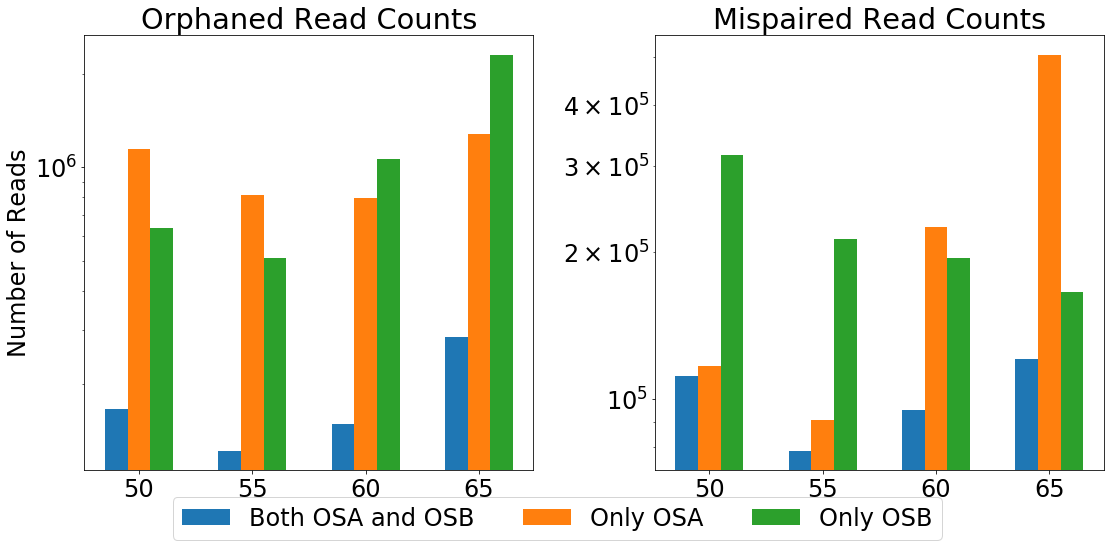

In [8]:
fig,ax = plt.subplots(1,2,figsize = (16,8))
d = [MS50_OSA['Orphaned Reads in Both Genomes'], MS50_OSA['Orphaned Reads in Only One Genome '], 
     MS50_OSB['Orphaned Reads in Only One Genome ']]
ax[0].bar(x = 0, height = d[0], color = 'C0', label = 'Both OSA and OSB')
ax[0].bar(x = 0.8, height = d[1], color = 'C1', label = 'Only OSA')
ax[0].bar(x = 1.6, height = d[2], color = 'C2', label = 'Only OSB')
d = [MS50_OSA['Mispaired Reads in Both Genomes'], MS50_OSA['Mispaired Reads in Only One Genome '], 
     MS50_OSB['Mispaired Reads in Only One Genome ']]
ax[1].bar(x = 0, height = d[0], color = 'C0')
ax[1].bar(x = 0.8, height = d[1], color = 'C1')
ax[1].bar(x = 1.6, height = d[2], color = 'C2')

d = [MS55_OSA['Orphaned Reads in Both Genomes'], MS55_OSA['Orphaned Reads in Only One Genome '], 
     MS55_OSB['Orphaned Reads in Only One Genome ']]
ax[0].bar(x = 4, height = d[0], color = 'C0')
ax[0].bar(x = 4.8, height = d[1], color = 'C1')
ax[0].bar(x = 5.6, height = d[2], color = 'C2')
d = [MS55_OSA['Mispaired Reads in Both Genomes'], MS55_OSA['Mispaired Reads in Only One Genome '], 
     MS55_OSB['Mispaired Reads in Only One Genome ']]
ax[1].bar(x = 4, height = d[0], color = 'C0')
ax[1].bar(x = 4.8, height = d[1], color = 'C1')
ax[1].bar(x = 5.6, height = d[2], color = 'C2')

d = [MS60_OSA['Orphaned Reads in Both Genomes'], MS60_OSA['Orphaned Reads in Only One Genome '], 
     MS60_OSB['Orphaned Reads in Only One Genome ']]
ax[0].bar(x = 8, height = d[0], color = 'C0')
ax[0].bar(x = 8.8, height = d[1], color = 'C1')
ax[0].bar(x = 9.6, height = d[2], color = 'C2')
d = [MS60_OSA['Mispaired Reads in Both Genomes'], MS60_OSA['Mispaired Reads in Only One Genome '], 
     MS60_OSB['Mispaired Reads in Only One Genome ']]
ax[1].bar(x = 8, height = d[0], color = 'C0')
ax[1].bar(x = 8.8, height = d[1], color = 'C1')
ax[1].bar(x = 9.6, height = d[2], color = 'C2')

d = [MS65_OSA['Orphaned Reads in Both Genomes'], MS65_OSA['Orphaned Reads in Only One Genome '], 
     MS65_OSB['Orphaned Reads in Only One Genome ']]
ax[0].bar(x = 12, height = d[0], color = 'C0')
ax[0].bar(x = 12.8, height = d[1], color = 'C1')
ax[0].bar(x = 13.6, height = d[2], color = 'C2')
d = [MS65_OSA['Mispaired Reads in Both Genomes'], MS65_OSA['Mispaired Reads in Only One Genome '], 
     MS65_OSB['Mispaired Reads in Only One Genome ']]
ax[1].bar(x = 12, height = d[0], color = 'C0')
ax[1].bar(x = 12.8, height = d[1], color = 'C1')
ax[1].bar(x = 13.6, height = d[2], color = 'C2')


ax[0].set_yscale('log')
ax[0].set_title('Orphaned Read Counts')
ax[0].set_ylabel('Number of Reads')
ax[0].set_xticks([0.8,4.8,8.8,12.8])
ax[0].set_xticklabels(['50','55','60','65'])

ax[1].set_yscale('log')
ax[1].set_title('Mispaired Read Counts')
ax[1].set_xticks([0.8,4.8,8.8,12.8])
ax[1].set_xticklabels(['50','55','60','65'])

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 3)
fig.tight_layout()
fig.subplots_adjust(bottom = 0.15)

fig.savefig('fig-2.pdf', transparent=True)

In [11]:
MS50_same_frag = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS50/MS50.OSA.Same.Frag.Lengths')
MS50_diff_frag_OSA = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS50/MS50.OSA.Diff.Frag.Lengths')
MS50_diff_frag_OSB = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS50/MS50.OSB.Diff.Frag.Lengths')


MS55_same_frag = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS55/MS55.OSA.Same.Frag.Lengths')
MS55_diff_frag_OSA = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS55/MS55.OSA.Diff.Frag.Lengths')
MS55_diff_frag_OSB = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS55/MS55.OSB.Diff.Frag.Lengths')


MS60_same_frag = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS60/MS60.OSA.Same.Frag.Lengths')
MS60_diff_frag_OSA = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS60/MS60.OSA.Diff.Frag.Lengths')
MS60_diff_frag_OSB = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS60/MS60.OSB.Diff.Frag.Lengths')


MS65_same_frag = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS65/MS65.OSA.Same.Frag.Lengths')
MS65_diff_frag_OSA = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS65/MS65.OSA.Diff.Frag.Lengths')
MS65_diff_frag_OSB = Load_Fragment_Counts('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS65/MS65.OSB.Diff.Frag.Lengths')


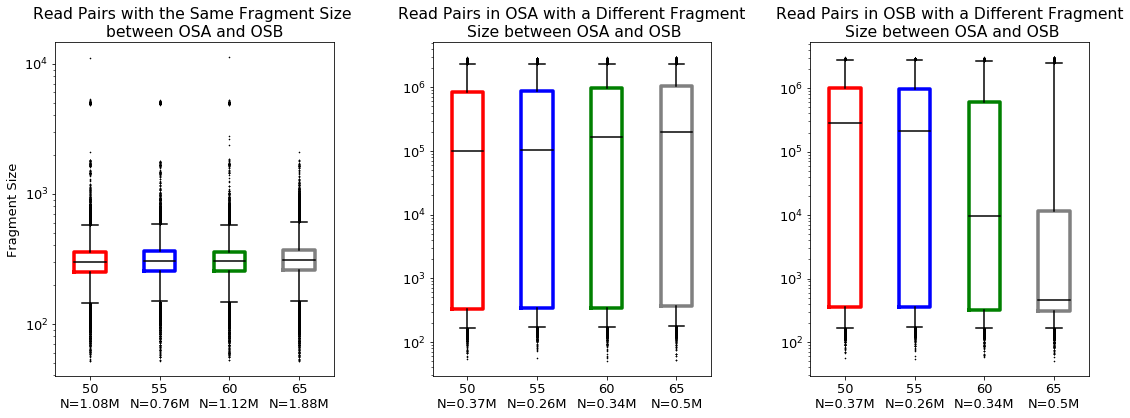

In [15]:
fig, ax = plt.subplots(1,3,figsize= (16,6))
Plot_Box_Plots([MS50_same_frag],[1], 'red', ax[0])
Plot_Box_Plots([MS55_same_frag],[2], 'blue', ax[0])
Plot_Box_Plots([MS60_same_frag],[3], 'green', ax[0])
Plot_Box_Plots([MS65_same_frag],[4], 'grey', ax[0])
ax[0].set_xlim([0.5,4.5])
#ax[0].set_ylim([0,6000])
ax[0].set_xticks([1,2,3,4])
ax[0].set_ylabel('Fragment Size')
ax[0].set_xticklabels(['50\nN='+str(round(len(MS50_same_frag)/1000000,2))+'M',
                       '55\nN='+str(round(len(MS55_same_frag)/1000000,2))+'M',
                       '60\nN='+str(round(len(MS60_same_frag)/1000000,2))+'M',
                       '65\nN='+str(round(len(MS65_same_frag)/1000000,2))+'M'])
ax[0].set_title('Read Pairs with the Same Fragment Size \nbetween OSA and OSB')
ax[0].set_yscale('log')

Plot_Box_Plots([MS50_diff_frag_OSA],[1], 'red', ax[1])
Plot_Box_Plots([MS55_diff_frag_OSA],[2], 'blue', ax[1])
Plot_Box_Plots([MS60_diff_frag_OSA],[3], 'green', ax[1])
Plot_Box_Plots([MS65_diff_frag_OSA],[4], 'grey', ax[1])
ax[1].set_xlim([0.5,4.5])
ax[1].set_xticks([1,2,3,4])
ax[1].set_xticklabels(['50\nN='+str(round(len(MS50_diff_frag_OSA)/1000000,2))+'M',
                       '55\nN='+str(round(len(MS55_diff_frag_OSA)/1000000,2))+'M',
                       '60\nN='+str(round(len(MS60_diff_frag_OSA)/1000000,2))+'M',
                       '65\nN='+str(round(len(MS65_diff_frag_OSA)/1000000,2))+'M'])
ax[1].set_title('Read Pairs in OSA with a Different Fragment\n Size between OSA and OSB')
ax[1].set_yscale('log')

Plot_Box_Plots([MS50_diff_frag_OSB],[1], 'red', ax[2])
Plot_Box_Plots([MS55_diff_frag_OSB],[2], 'blue', ax[2])
Plot_Box_Plots([MS60_diff_frag_OSB],[3], 'green', ax[2])
Plot_Box_Plots([MS65_diff_frag_OSB],[4], 'grey', ax[2])
ax[2].set_xlim([0.5,4.5])
ax[2].set_xticks([1,2,3,4])
ax[2].set_xticklabels(['50\nN='+str(round(len(MS50_diff_frag_OSB)/1000000,2))+'M',
                       '55\nN='+str(round(len(MS55_diff_frag_OSB)/1000000,2))+'M',
                       '60\nN='+str(round(len(MS60_diff_frag_OSB)/1000000,2))+'M',
                       '65\nN='+str(round(len(MS65_diff_frag_OSB)/1000000,2))+'M'])
ax[2].set_title('Read Pairs in OSB with a Different Fragment\n Size between OSA and OSB')
ax[2].set_yscale('log')

fig.tight_layout()
fig.savefig('fig-3.pdf', transparent=True)

In [18]:
filedir = 'Mount/Hot_Springs_Analysis/OSA_OSB_Ressembly_Mummer/'

print('MS50')
MS50_OSA = Return_Continuous_Fragments(filedir+'MS50/OSA/MS50_OSA.tiling', 
                                       'Mount-2/MS50_megahit_assembled_contigs_osa/MS50_osa.contigs.fa.fai')
MS50_OSB = Return_Continuous_Fragments(filedir+'MS50/OSB/MS50_OSB.tiling',
                                      'Mount-2/MS50_megahit_assembled_contigs_osb/MS50_osb.contigs.fa.fai')

MS50
200 7882 13937 6351507
200 3972 37437 11636485


In [19]:
OSA_Len = 2932766
OSB_Len = 3046682

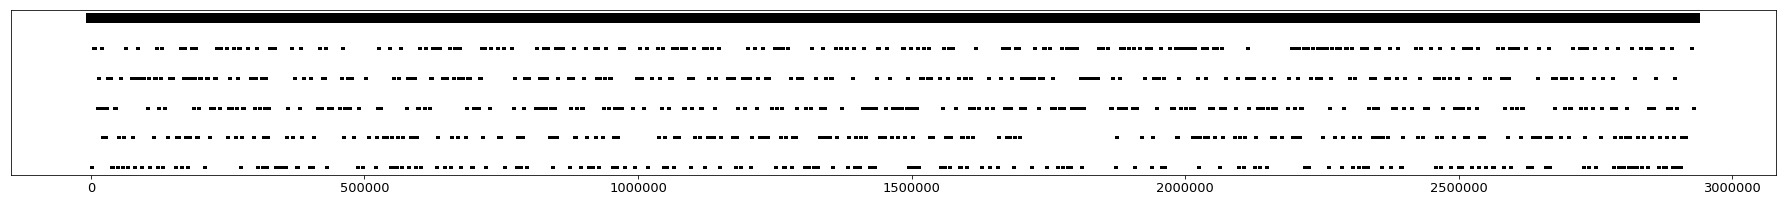

In [20]:
fig,ax = plt.subplots(1,1,figsize = (25,3))
ctr = 0
l=5
ax.plot([0,OSA_Len],[l,l], linewidth = 10, color = 'black')
for c in MS50_OSA:
    #ax.plot([c[0], c[1]], [l-0.5,l-0.5], color = 'red', linewidth = 5)
    ax.plot([c[0], c[1]], [ctr, ctr], color = 'black', linewidth=3)
    ctr += 1
    ctr = ctr%l
ax.set_yticks([])
#ax.set_title('MS50 OSA')
fig.tight_layout()
#fig.savefig('fig-1.png',transparent=True, dpi = 100)

In [21]:
df_MS50_OSA = pd.read_csv('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS50/MS50.OSA.Coverage', sep = '\t')
df_MS55_OSA = pd.read_csv('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS55/MS55.OSA.Coverage', sep = '\t')
df_MS60_OSA = pd.read_csv('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS60/MS60.OSA.Coverage', sep = '\t')
df_MS65_OSA = pd.read_csv('Research-Activities/Data/Hot-Spring/Differential_Read_Counting/MS65/MS65.OSA.Coverage', sep = '\t')

In [22]:
###Differentially Abundant genes identified by Jackie

start = 482200 - 150
end = 483900

cov_ms50 = np.zeros(end)
for i in range(start, end):
    cov = df_MS50_OSA.iloc[i]['Fold_Cov']# + df_MS50_OSA.iloc[i]['Mispaired_Both'] + df_MS50_OSA.iloc[i]['Orphaned_Only'] + df_MS50_OSA.iloc[i]['Orphaned_Both']
    cov_ms50[i:i+150] = cov_ms50[i:i+150] + cov
cov_ms50 = cov_ms50[start+150:end]

cov_ms55 = np.zeros(end)
for i in range(start, end):
    cov = df_MS55_OSA.iloc[i]['Fold_Cov']# + df_MS55_OSA.iloc[i]['Mispaired_Both'] + df_MS55_OSA.iloc[i]['Orphaned_Only']+ df_MS55_OSA.iloc[i]['Orphaned_Both']
    cov_ms55[i:i+150] += cov
cov_ms55 = cov_ms55[start+150:end]

cov_ms60 = np.zeros(end)
for i in range(start, end):
    cov = df_MS60_OSA.iloc[i]['Fold_Cov']# + df_MS60_OSA.iloc[i]['Mispaired_Both'] + df_MS60_OSA.iloc[i]['Orphaned_Only']+ df_MS60_OSA.iloc[i]['Orphaned_Both']
    cov_ms60[i:i+150] += cov
cov_ms60 = cov_ms60[start+150:end]

cov_ms65 = np.zeros(end)
for i in range(start, end):
    cov = df_MS65_OSA.iloc[i]['Fold_Cov']# + df_MS65_OSA.iloc[i]['Mispaired_Both'] + df_MS65_OSA.iloc[i]['Orphaned_Only']+ df_MS65_OSA.iloc[i]['Orphaned_Both']
    cov_ms65[i:i+150] += cov
cov_ms65 = cov_ms65[start+150:end]


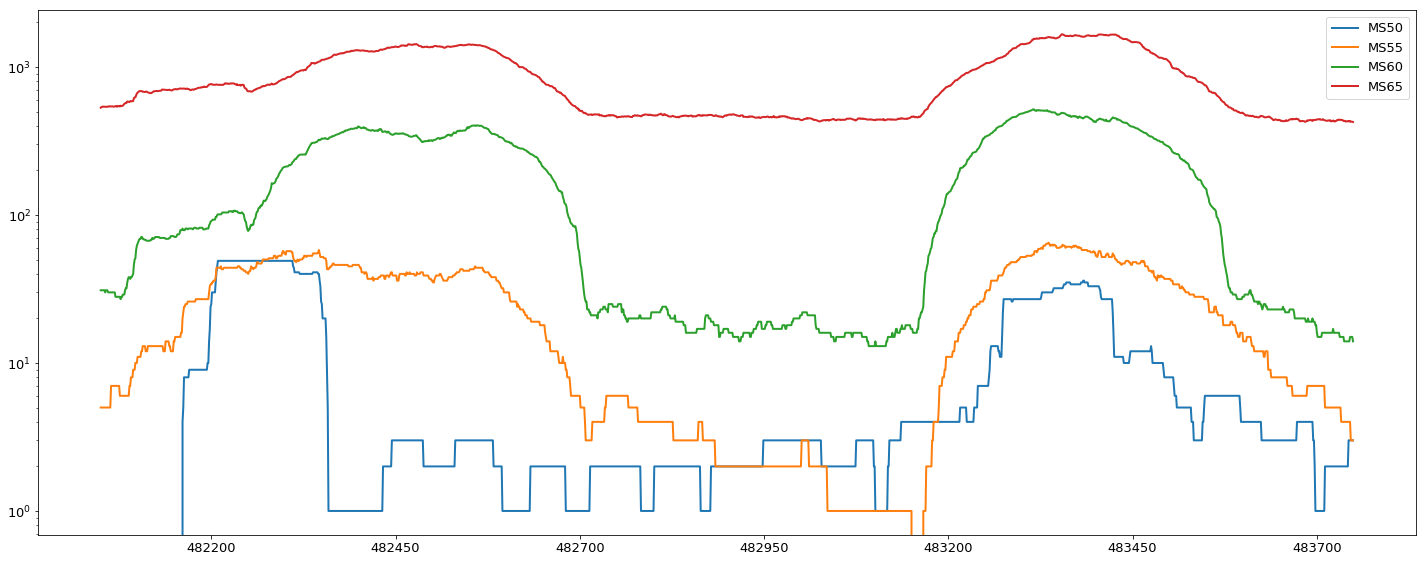

In [23]:
plt.rcParams.update(rcParams)

fig,ax = plt.subplots(1,1,figsize = (20, 8))
ax.plot(cov_ms50, label = 'MS50', linewidth = 2)
ax.plot(cov_ms55, label = 'MS55', linewidth = 2)
ax.plot(cov_ms60, label = 'MS60', linewidth = 2)
ax.plot(cov_ms65, label = 'MS65', linewidth = 2)
ax.legend()
ax.set_xticks(list(range(150, end-start, 250)))
ax.set_xticklabels(list(range(start+150, end, 250)))
ax.set_yscale('log')
fig.tight_layout()
fig.savefig('fig-4.pdf', transparent=True)